<br>

<div align=center><font color=maroon size=6><b>Learning PyTorch with Examples</b></font></div>

<br>

<font size=4><b>References:</b></font>
1. Pytorch official tutorials: <a href="https://pytorch.org/tutorials/index.html" style="text-decoration:none;">WELCOME TO PYTORCH TUTORIALS</a>

    * <a href="https://pytorch.org/tutorials/beginner/pytorch_with_examples.html" style="text-decoration:none;">Learning PyTorch with Examples</a>

<br>

<font size=3 color=dodgerblue><b>Note:</b></font>
<div class="alert alert-block alert-info">This is one of our older PyTorch tutorials. You can view our latest beginner content in <a href="https://pytorch.org/tutorials/beginner/basics/intro.html"><font color=red>Learn the Basics</font></a>.</div>

<br>

This tutorial introduces the fundamental concepts of [PyTorch](https://github.com/pytorch/pytorch) through self-contained examples.

At its core, PyTorch provides two main features:

* An <font size=3 color=maroon>n-dimensional <b>Tensor</b></font>, similar to `numpy` but <font color=maroon>can run on GPUs</font>.


* <font size=3 color=maroon>Automatic <b>differentiation</b></font> for building and training neural networks.


We will use a problem of fitting $y=\sin(x)y=sin(x)$ with a third order polynomial as our running example. The network will have four parameters, and will be trained with gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output.

<br>
<br>
<br>

# Tensors

<br>

## Warm-up: numpy

Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an `n-dimensional array` object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. <font color=maroon>However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:</font>

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)
        
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1592.4743269300131
199 1099.6851073048656
299 761.0607886252101
399 528.1098757747009
499 367.6770154758674
599 257.06599543486567
699 180.722469951976
799 127.97441234194643
899 91.49128400843063
999 66.2321089476496
1099 48.726499304040615
1199 36.58268240070046
1299 28.1504711446716
1399 22.290114829225683
1499 18.213586420493456
1599 15.375483166349966
1699 13.397947427241979
1799 12.0189420553974
1899 11.056576615369323
1999 10.384477226898264
Result: y = -0.03844380392199034 + 0.8414260553036357 x + 0.0066321958842018485 x^2 + -0.09115199384264042 x^3


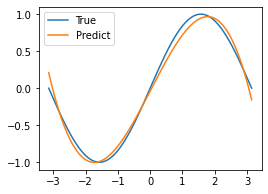

In [6]:
import matplotlib.pyplot as plt

y_pred = a + b * x + c * x ** 2 + d * x ** 3

plt.figure(figsize=(4,3))
plt.plot(x, y, label="True")
plt.plot(x, y_pred, label="Predict")
plt.legend()
plt.show()

<br>
<br>

## Tensors

Numpy is a great framework, but <font color=maroon>it cannot utilize GPUs to accelerate its numerical computations</font>. For modern deep neural networks, GPUs often provide speedups of [50x or greater](https://github.com/jcjohnson/cnn-benchmarks), so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the <font color=blue><b>Tensor</b></font>. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. <font color=maroon>Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.</font>

<br>

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network:

In [7]:
# -*- coding: utf-8 -*-

import torch
import math

dtype = torch.float
# device = torch.device("cpu")     # Uncomment this to run on CPU
device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 681.9814453125
199 454.1802062988281
299 303.479736328125
399 203.7804718017578
499 137.8199920654297
599 94.17926025390625
699 65.30442810058594
799 46.19884490966797
899 33.556732177734375
999 25.191015243530273
1099 19.654865264892578
1199 15.99098014831543
1299 13.566062927246094
1399 11.96109676361084
1499 10.898712158203125
1599 10.195430755615234
1699 9.729850769042969
1799 9.421611785888672
1899 9.217506408691406
1999 9.082351684570312
Result: y = -0.0028181641828268766 + 0.8411238789558411 x + 0.0004861805064138025 x^2 + -0.0911090150475502 x^3


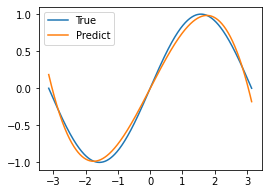

In [13]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3

plt.figure(figsize=(4,3))
plt.plot(x.cpu().numpy(), y.cpu().numpy(), label="True")
plt.plot(x.cpu().numpy(), y_pred.cpu().numpy(), label="Predict")
plt.legend()
plt.show()

<br>

对于 **`y.numpy()`** 报错：<br>
<font color=red>TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.</font>


对于 **`y.item()`** 报错：<br>
<font color=red>ValueError: only one element tensors can be converted to Python scalars.</font>

<br>
<br>
<br>

# Autograd

<br>

## Tensors and autograd

In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to automate the computation of backward passes in neural networks. <br>
The <font color=maroon><b>autograd</b> package</font> in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a <font color=maroon><b>computational graph</b></font>; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If <font color=maroon><b>x</b></font> is a Tensor that has <font color=maroon><b>x.requires_grad=True</b></font> then <font color=maroon><b>x.grad</b></font> is another Tensor holding the gradient of <font color=maroon><b>x</b></font> with respect to some scalar value.

<br>

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

In [14]:
# -*- coding: utf-8 -*-

import torch
import math

dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0")

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial,
# we need 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


learning_rate = 1e-6
for t in range(2000):
    
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()
    
    # Manually update weights using gradient descent. 
    # Wrap in torch.no_grad() because weights have requires_grad=True, 
    # but we don't need to track this in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 571.4713134765625
199 383.760986328125
299 258.79345703125
399 175.56089782714844
499 120.10035705566406
599 83.12773895263672
699 58.467735290527344
799 42.01148986816406
899 31.023635864257812
999 23.682941436767578
1099 18.775741577148438
1199 15.493261337280273
1299 13.296150207519531
1399 11.824441909790039
1499 10.837973594665527
1599 10.176240921020508
1699 9.732013702392578
1799 9.43354320526123
1899 9.232830047607422
1999 9.097758293151855
Result: y = -0.009887546300888062 + 0.8432244658470154 x + 0.0017057649092748761 x^2 + -0.09140780568122864 x^3


<br>
<br>

## Defining new autograd functions

Under the hood, each primitive autograd operator is really two functions that operate on Tensors. 

* The **forward** function computes output Tensors from input Tensors. 


* The **backward** function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch we can easily define our own autograd operator by defining a subclass of <font size=3 color=maroon><b>torch.autograd.Function</b></font> and implementing the **forward** and **backward** functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

<br>

In this example we define our model as <font size=4><b>$y=a+bP_3(c+dx)$</b></font>, where <font size=3><b>$P_3(x)=\frac{1}{2}(5x^3-3x)$</b></font> is the [Legendre polynomial](https://en.wikipedia.org/wiki/Legendre_polynomials) of degree three. We write our own custom autograd function for computing forward and backward of <font size=3><b>$P_3$</b></font>, and use it to implement our model:

In [15]:
# -*- coding: utf-8 -*-
import torch
import math

class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """
    
    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. 
        
        ctx is a context object that can be used to stash information for 
        backward computation. 
        You can cache arbitrary objects for use in the backward pass 
        using the ctx.save_for_backward method.
        """
        
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)
    
    
    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


In [16]:
dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0")

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

In [17]:
learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    
    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

        
    # Use autograd to compute the backward pass.
    loss.backward()
    
    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03520202636719
499 50.978515625
599 37.40313720703125
699 28.20686912536621
799 21.973186492919922
899 17.745729446411133
999 14.877889633178711
1099 12.931766510009766
1199 11.610918998718262
1299 10.714248657226562
1399 10.105474472045898
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -1.765793067320942e-11 + -2.208526849746704 * P3(9.924167737596079e-11 + 0.2554861009120941 x)


<br>
<br>
<br>

# nn module

<br>

## nn

<br>

<font color=red size=3>这里开始就不像前面那样子，要显式地定义模型变量 a,b,c,d 了, 因为使用了 <b>nn</b> package</font>

<br>

<font color=maroon size=3>Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.</font>

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In **TensorFlow**, packages like [Keras](https://github.com/fchollet/keras), [TensorFlow-Slim](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim), and [TFLearn](http://tflearn.org/) provide higher-level abstractions over raw computational graphs that are useful for building neural networks.


In **PyTorch**, the **`nn`** package serves this same purpose. The **`nn`** package defines a set of **Modules**, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The **`nn`** package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the **`nn`** package to implement our polynomial model network:

In [27]:
# -*- coding: utf-8 -*-

import torch
import math

# Create Tensors to hold input and outputs
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 


# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction ='sum')


learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)
    
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
        
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 1142.6865234375
199 758.8623046875
299 504.9787902832031
399 337.04144287109375
499 225.95269775390625
599 152.46685791015625
699 103.85417938232422
799 71.69477844238281
899 50.419307708740234
999 36.34388732910156
1099 27.031341552734375
1199 20.86994743347168
1299 16.793184280395508
1399 14.095660209655762
1499 12.310619354248047
1599 11.12936782836914
1699 10.34761905670166
1799 9.830268859863281
1899 9.487855911254883
1999 9.261192321777344


In [28]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print("Result: y = {} + {}x + {}x^2 + {}x^23".format(linear_layer.bias.item(),
                                                     linear_layer.weight[:, 0].item(),
                                                     linear_layer.weight[:, 1].item(),
                                                     linear_layer.weight[:, 2].item()))

Result: y = 0.0030448385514318943 + 0.8364489078521729x + -0.0005252856062725186x^2 + -0.09044403582811356x^23


<br>
<br>

## optim

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with **`torch.no_grad`()**. <font color=maroon>This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like <b>AdaGrad</b>, <b>RMSProp</b>, <b>Adam</b>, etc.</font>

The <font size=3 color=maroon><b>optim</b> package</font> in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the **`nn`** package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the **`optim`** package:

In [30]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)


# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0,1)
)
loss_fn = torch.nn.MSELoss(reduction = 'sum')


# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more 
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

    
linear_layer = model[0]
print("Result: y = {} + {}x + {}x^2 + {}x^23".format(linear_layer.bias.item(),
                                                     linear_layer.weight[:, 0].item(),
                                                     linear_layer.weight[:, 1].item(),
                                                     linear_layer.weight[:, 2].item()))

99 667.998779296875
199 458.1214904785156
299 317.4249267578125
399 216.35853576660156
499 142.69845581054688
599 89.19847106933594
699 51.7510986328125
799 27.9217472076416
899 15.168012619018555
999 10.121133804321289
1099 8.94022274017334
1199 8.844158172607422
1299 8.894937515258789
1399 8.95056438446045
1499 8.91171646118164
1599 8.907262802124023
1699 8.925557136535645
1799 8.925528526306152
1899 8.918907165527344
1999 8.91904354095459
Result: y = -0.0005042538396082819 + 0.8562459945678711x + -0.0005042566335760057x^2 + -0.09382553398609161x^23


<br>
<br>

## Custom nn Modules

Sometimes you will want to specify models that are more complex than a sequence of existing Modules; for these cases you can define your own Modules by subclassing <font size=3 color=maroon><b>nn.Module</b></font> and defining a **forward** which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.

In this example we implement our third order polynomial as a custom Module subclass:

In [33]:
# -*- coding: utf-8 -*-
import torch
import math

class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
    
    
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    
    
    def string(self):
        """
        Just like any class in Python, 
        you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [34]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. 
# The call to model.parameters() in the SGD constructor will contain the 
# learnable parameters (defined with torch.nn.Parameter) 
# which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 145.7870330810547
199 104.40569305419922
299 75.57723999023438
399 55.47594451904297
499 41.44903564453125
599 31.65375328063965
699 24.808612823486328
799 20.02188491821289
899 16.672378540039062
999 14.327081680297852
1099 12.683984756469727
1199 11.532179832458496
1299 10.724339485168457
1399 10.157449722290039
1499 9.75944709777832
1599 9.479891777038574
1699 9.283445358276367
1799 9.145345687866211
1899 9.048223495483398
1999 8.979896545410156
Result: y = 0.013032843358814716 + 0.8534984588623047 x + -0.0022483805660158396 x^2 + -0.09286918491125107 x^3


<br>
<br>

## Control Flow + Weight Sharing

As an example of dynamic graphs and weight sharing, we implement a very strange model: a third-fifth order polynomial that on each forward pass chooses a random number between 3 and 5 and uses that many orders, reusing the same weights multiple times to compute the fourth and fifth order.

For this model we can use normal Python flow control to implement the loop, and we can implement weight sharing by simply reusing the same parameter multiple times when defining the forward pass.

We can easily implement this model as a Module subclass:

In [35]:
# -*- coding: utf-8 -*-
import random
import torch
import math

class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))
        
        
        
    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y
    
    
    
    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'

In [36]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 359.73876953125
3999 163.94100952148438
5999 77.2972640991211
7999 38.73474884033203
9999 21.993488311767578
11999 14.574845314025879
13999 11.33182144165039
15999 9.91517448425293
17999 9.304458618164062
19999 9.03718090057373
21999 8.953987121582031
23999 8.60279655456543
25999 8.856475830078125
27999 8.876060485839844
29999 8.841714859008789
Result: y = 0.0008062972337938845 + 0.8557498455047607 x + -0.0006614175508730114 x^2 + -0.09346222132444382 x^3 + 9.445273462915793e-05 x^4 ? + 9.445273462915793e-05 x^5 ?


<br>
<br>
<br>